# Agenda
* Numpy
* Pandas
* Lab


# Introduction


## Create a new notebook for your code-along:

From our submission directory, type:
    
    jupyter notebook

From the IPython Dashboard, open a new notebook.
Change the title to: "Numpy and Pandas"

# Introduction to Numpy

* Overview
* ndarray
* Indexing and Slicing

More info: [http://wiki.scipy.org/Tentative_NumPy_Tutorial](http://wiki.scipy.org/Tentative_NumPy_Tutorial)


## Numpy Overview

* Why Python for Data? Numpy brings *decades* of C math into Python!
* Numpy provides a wrapper for extensive C/C++/Fortran codebases, used for data analysis functionality
* NDAarray allows easy vectorized math and broadcasting (i.e. functions for vector elements of different shapes)

In [1]:
import numpy as np

### Creating ndarrays

An array object represents a multidimensional, homogeneous array of fixed-size items. 

In [2]:
# Creating arrays
a = np.zeros((3))
b = np.ones((2,3))
c = np.random.randint(1,10,(2,3))
d = np.arange(0,11,1)

What are these functions?

    arange?

In [3]:
# Note the way each array is printed:
print 'a'; print a; print '\n'
print 'b'; print b; print '\n'
print 'c'; print c; print '\n'
print 'd'; print d; print '\n'

a
[ 0.  0.  0.]


b
[[ 1.  1.  1.]
 [ 1.  1.  1.]]


c
[[9 9 6]
 [4 3 1]]


d
[ 0  1  2  3  4  5  6  7  8  9 10]




In [4]:
## Arithmetic in arrays is element wise

In [5]:
a = np.array( [20,30,40,50] )
b = np.arange( 4 )
print a
print b

[20 30 40 50]
[0 1 2 3]


In [6]:
c = a-b
c

array([20, 29, 38, 47])

In [7]:
b**2

array([0, 1, 4, 9])

## Indexing, Slicing and Iterating

In [8]:
# one-dimensional arrays work like lists:
a = np.arange(10)**2

In [9]:
a

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [10]:
a[2:5]

array([ 4,  9, 16])

In [11]:
# Multidimensional arrays use tuples with commas for indexing
# with (row,column) conventions beginning, as always in Python, from 0

In [12]:
b = np.random.randint(1,100,(4,4))

In [13]:
b

array([[65, 88, 97, 21],
       [17,  4, 76, 92],
       [69, 92, 59,  6],
       [ 5, 52, 73, 69]])

In [14]:
# Guess the output
#print(b[2,3])
print(b[0,0])


65


In [15]:
b[0:3,1],b[:,1]

(array([88,  4, 92]), array([88,  4, 92, 52]))

In [16]:
b[1:3,:]

array([[17,  4, 76, 92],
       [69, 92, 59,  6]])

# Introduction to Pandas

* Object Creation
* Viewing data
* Selection
* Missing data
* Grouping
* Reshaping
* Time series
* Plotting
* i/o
 

_pandas.pydata.org_

## Pandas Overview

_Outline Source: [pandas.pydata.org](http://pandas.pydata.org/pandas-docs/stable/10min.html)_

In [17]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# MAGIC!
%matplotlib inline 

In [18]:
titanic = pd.read_csv('titanic.csv')
titanic[0:5]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
# Columns are stored as Indices
titanic.columns

Index([u'survived', u'pclass', u'name', u'sex', u'age', u'sibsp', u'parch',
       u'ticket', u'fare', u'cabin', u'embarked'],
      dtype='object')

In [20]:
# ...but you can also extract their names
titanic.columns.values

array(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked'], dtype=object)

In [21]:
# With specific dtypes
titanic.dtypes

survived      int64
pclass        int64
name         object
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object

In [22]:
type(titanic.name[1])

str

#### Viewing Data

In [23]:
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
titanic.tail()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [25]:
titanic.sort_values(by='pclass').head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
445,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S
310,1,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,11767,83.1583,C54,C
309,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C
307,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9000,C65,C
306,1,1,"Fleming, Miss. Margaret",female,NaN,0,0,17421,110.8833,NaN,C


### Selection

In [26]:
titanic[['sex','age']].head()

,sex,age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0


In [27]:
titanic[0:3].head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [28]:
# By label
titanic.loc[0]

survived                          0
pclass                            3
name        Braund, Mr. Owen Harris
sex                            male
age                              22
sibsp                             1
parch                             0
ticket                    A/5 21171
fare                           7.25
cabin                           NaN
embarked                          S
Name: 0, dtype: object

In [29]:
# multi-axis by label
titanic.loc[0:3,['sex','age']]

,sex,age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0


In [30]:
# Fast access to scalar
titanic.at[0,'age']

22.0

In [31]:
# iloc provides integer locations similar to np style
titanic.iloc[:3]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Boolean Indexing

In [32]:
titanic[titanic.age > 70] # Basically a 'where' operation

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
96,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


### Copying

In [33]:
titanic2 = titanic.copy() # Without "copy" it would act on the dataset

titanic2.pclass = titanic2.pclass + 1 # Not a good idea

In [34]:
titanic2.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,4,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,4,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,2,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,4,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Missing Data

In [35]:
# find where values are null
pd.isnull(titanic).head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False


In [36]:
pd.isnull(titanic).sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

In [37]:
titanic[pd.isnull(titanic.cabin)==True].head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


### Operations

In [38]:
titanic.describe()

C:\Users\Doug\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [39]:
titanic.mean(),titanic.mean(1).head() # Operation on two different axes (columns vs rows)

(survived     0.383838
 pclass       2.308642
 age         29.699118
 sibsp        0.523008
 parch        0.381594
 fare        32.204208
 dtype: float64, 0     5.541667
 1    18.713883
 2     6.320833
 3    15.183333
 4     7.675000
 dtype: float64)

### Applying functions

In [40]:
titanic[['pclass','age', 'fare']].apply(np.var)

pclass       0.698231
age        210.723580
fare      2466.665312
dtype: float64

In [41]:
titanic[['pclass','age','fare']].apply(lambda x: x.max() - x.min())

pclass      2.0000
age        79.5800
fare      512.3292
dtype: float64

In [42]:
# Built in string methods
titanic.name[0:5].str.lower()

0                              braund, mr. owen harris
1    cumings, mrs. john bradley (florence briggs th...
2                               heikkinen, miss. laina
3         futrelle, mrs. jacques heath (lily may peel)
4                             allen, mr. william henry
Name: name, dtype: object

### Merge

In [43]:
# Create a dataset containing the names of the classes
pclass = [1,2,3]
pnames = ['Upper','Middle','Lower']
pclass_df = pd.DataFrame(list(zip(pclass, pnames)), columns=['pclass','pclass_names'])
pclass_df

,pclass,pclass_names
0,1,Upper
1,2,Middle
2,3,Lower


In [44]:
# Merging the two datasets
pd.merge(titanic, pclass_df).head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,pclass_names
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Lower
1,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Lower
2,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Lower
3,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Lower
4,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Lower


In [45]:
# What if we had more classes to add the to previous class dataframe?
pclass2 = [4,5]
pnames2 = ['Hull','Ocean']
pclass2_df = pd.DataFrame(list(zip(pclass2, pnames2)), columns=['pclass','pclass_names'])
pclass2_df

pd.concat([pclass_df, pclass2_df])

,pclass,pclass_names
0,1,Upper
1,2,Middle
2,3,Lower
0,4,Hull
1,5,Ocean


### Grouping


In [46]:
titanic.groupby(['pclass']).sum()

,survived,age,sibsp,parch,fare
pclass,,,,,
1,136,7111.42,90,77,18177.4125
2,87,5168.83,74,70,3801.8417
3,119,8924.92,302,193,6714.6951


### Reshaping/Pivoting

In [47]:
# Pivot Tables
pd.pivot_table(titanic,values=['fare','age'],index=['pclass'],columns=['sex'], aggfunc=np.mean)

fare                   age           
sex         female       male     female       male
pclass                                             
1       106.125798  67.226127  34.611765  41.281386
2        21.970121  19.741782  28.722973  30.740707
3        16.118810  12.661633  21.750000  26.507589

### Plotting


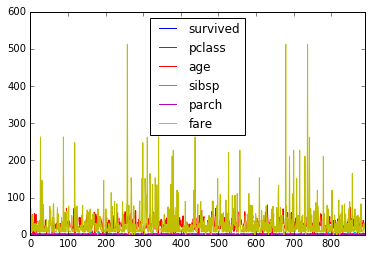

In [90]:
titanic.plot()
#titanic.plot(kind='hist', subplots=True)

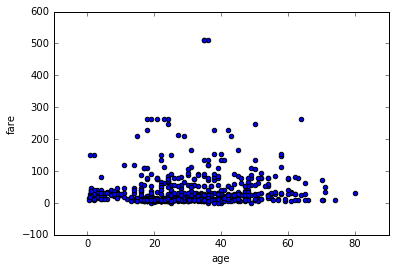

In [92]:
titanic.plot('age','fare',kind='scatter')

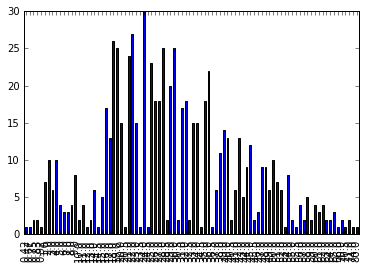

In [91]:
titanic.age.value_counts().sort_index().plot(kind='bar')

# Next Steps

**Recommended Resources**

Name | Description
--- | ---
[Official Pandas Tutorials](http://pandas.pydata.org/pandas-docs/stable/10min.html) | Wes & Company's selection of tutorials and lectures
[Julia Evans Pandas Cookbook](https://github.com/jvns/pandas-cookbook) | Great resource with examples from weather, bikes and 311 calls
[Learn Pandas Tutorials](https://bitbucket.org/hrojas/learn-pandas) | A great series of Pandas tutorials from Dave Rojas
[Research Computing Python Data PYNBs](https://github.com/ResearchComputing/Meetup-Fall-2013/tree/master/python) | A super awesome set of python notebooks from a meetup-based course exclusively devoted to pandas